In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load the datasets
incidents_data = pd.read_excel('incidents.xlsx')
traffic_logs_data = pd.read_excel('Traffic Logs.xlsx')
traffic_sensor_data = pd.read_excel('Traffic sensor.xlsx')

# 1. Exploratory Data Analysis (EDA)


In [3]:
# Convert 'IncidentDate' to datetime and extract the year
incidents_data['IncidentDate'] = pd.to_datetime(incidents_data['IncidentDate'], errors='coerce')
incidents_data['Year'] = incidents_data['IncidentDate'].dt.year

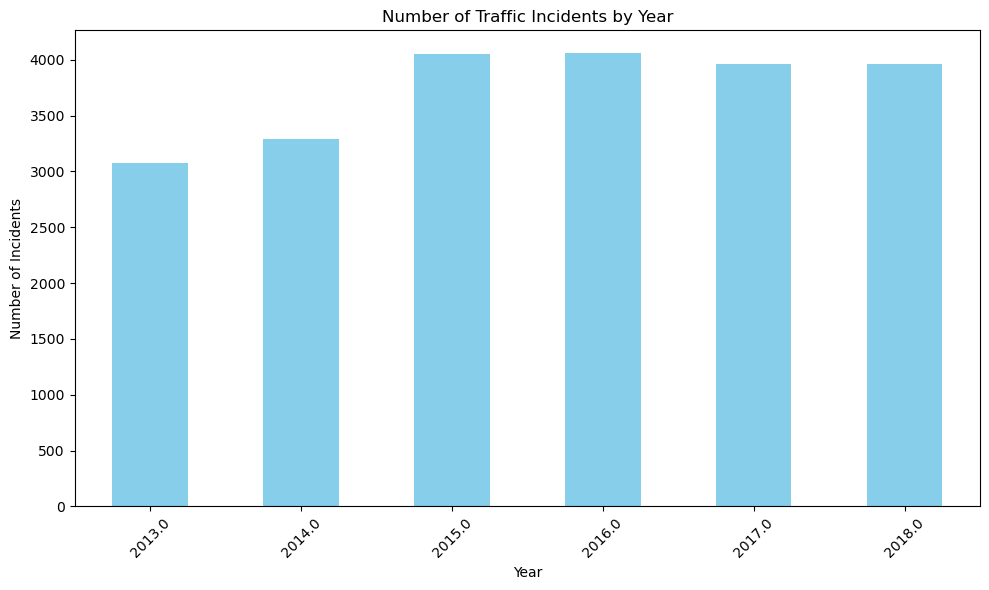

In [4]:
# Plot number of incidents by year
incident_by_year = incidents_data['Year'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
incident_by_year.plot(kind='bar', color='skyblue')
plt.title('Number of Traffic Incidents by Year')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Correlation between numeric fields (vehicles involved, injuries, fatalities, traffic speed)


In [5]:
# Clean and convert relevant columns to numeric, forcing errors to NaN
incidents_data['VehiclesInvolved'] = pd.to_numeric(incidents_data['VehiclesInvolved'], errors='coerce')
incidents_data['Injuries'] = pd.to_numeric(incidents_data['Injuries'], errors='coerce')
incidents_data['Fatalities'] = pd.to_numeric(incidents_data['Fatalities'], errors='coerce')
incidents_data['TrafficIncidentSpeed'] = pd.to_numeric(incidents_data['TrafficIncidentSpeed'], errors='coerce')

# Now calculate the correlation matrix
incidents_corr = incidents_data[['VehiclesInvolved', 'Injuries', 'Fatalities', 'TrafficIncidentSpeed']].corr()

print("Correlation Matrix:")
print(incidents_corr)


Correlation Matrix:
                      VehiclesInvolved  Injuries  Fatalities  \
VehiclesInvolved              1.000000  0.055288    0.000556   
Injuries                      0.055288  1.000000    0.047310   
Fatalities                    0.000556  0.047310    1.000000   
TrafficIncidentSpeed          0.042167  0.009097    0.001900   

                      TrafficIncidentSpeed  
VehiclesInvolved                  0.042167  
Injuries                          0.009097  
Fatalities                        0.001900  
TrafficIncidentSpeed              1.000000  


# 3. Analysis based on environmental factors


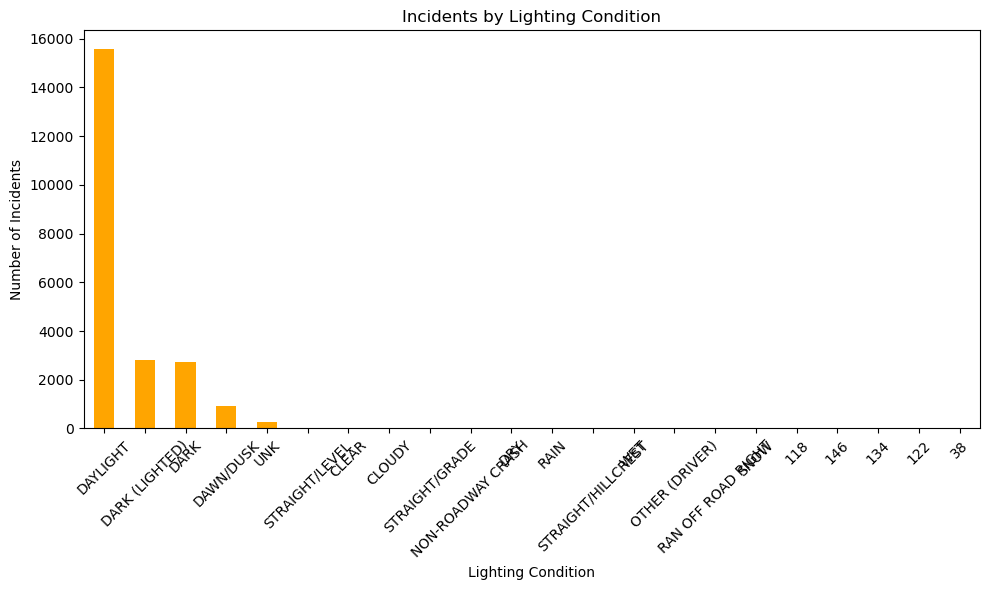

In [6]:
# Grouping incidents by LightingCondition, WeatherCondition, and RoadCharacteristics

# Lighting Conditions
lighting_conditions = incidents_data.groupby('LightingCondition')['IncidentID'].count().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
lighting_conditions.plot(kind='bar', color='orange')
plt.title('Incidents by Lighting Condition')
plt.xlabel('Lighting Condition')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

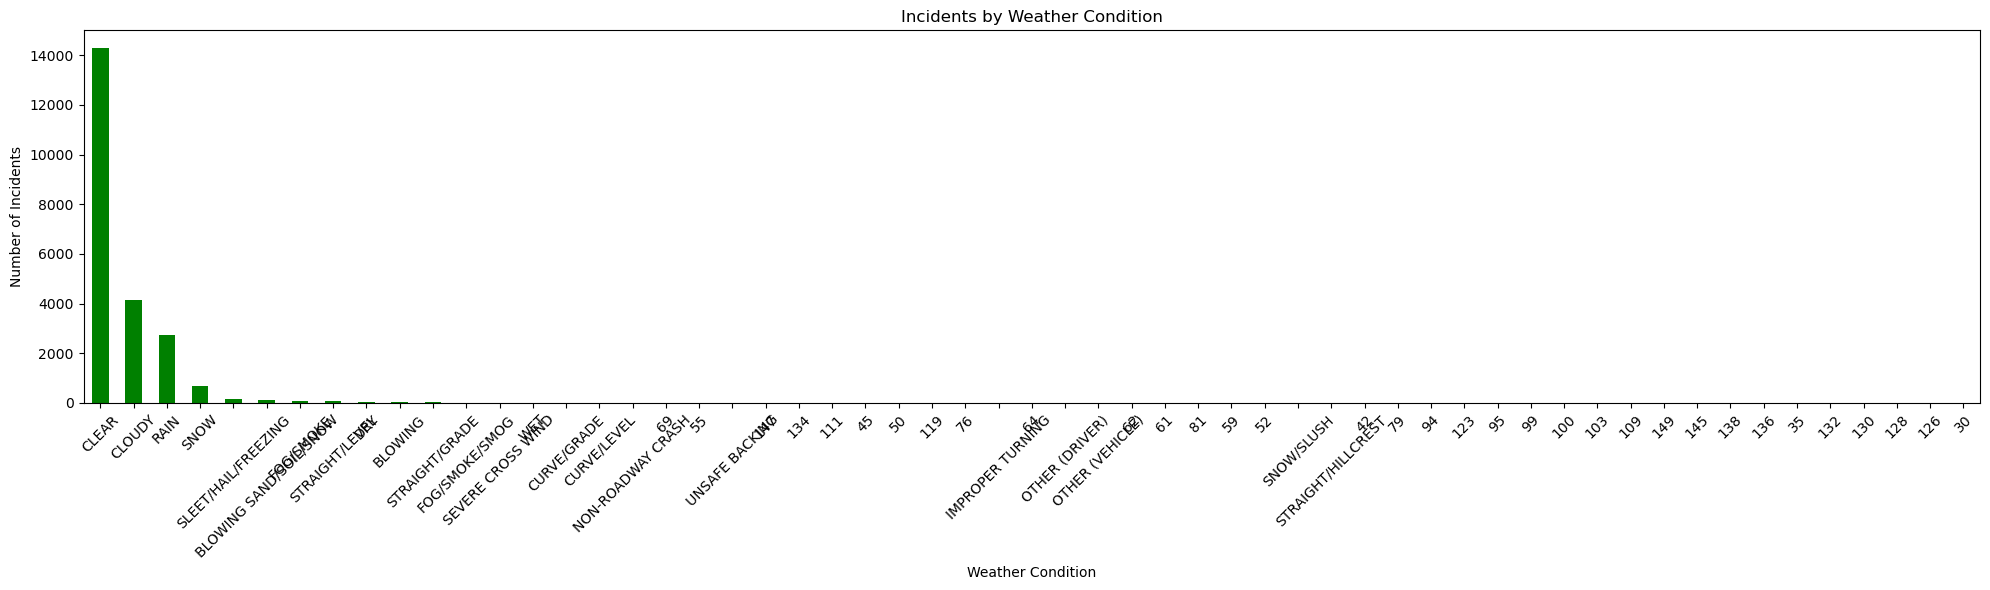

In [10]:
# Weather Conditions
weather_conditions = incidents_data.groupby('WeatherCondition')['IncidentID'].count().sort_values(ascending=False)
plt.figure(figsize=(20, 6))
weather_conditions.plot(kind='bar', color='green')
plt.title('Incidents by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

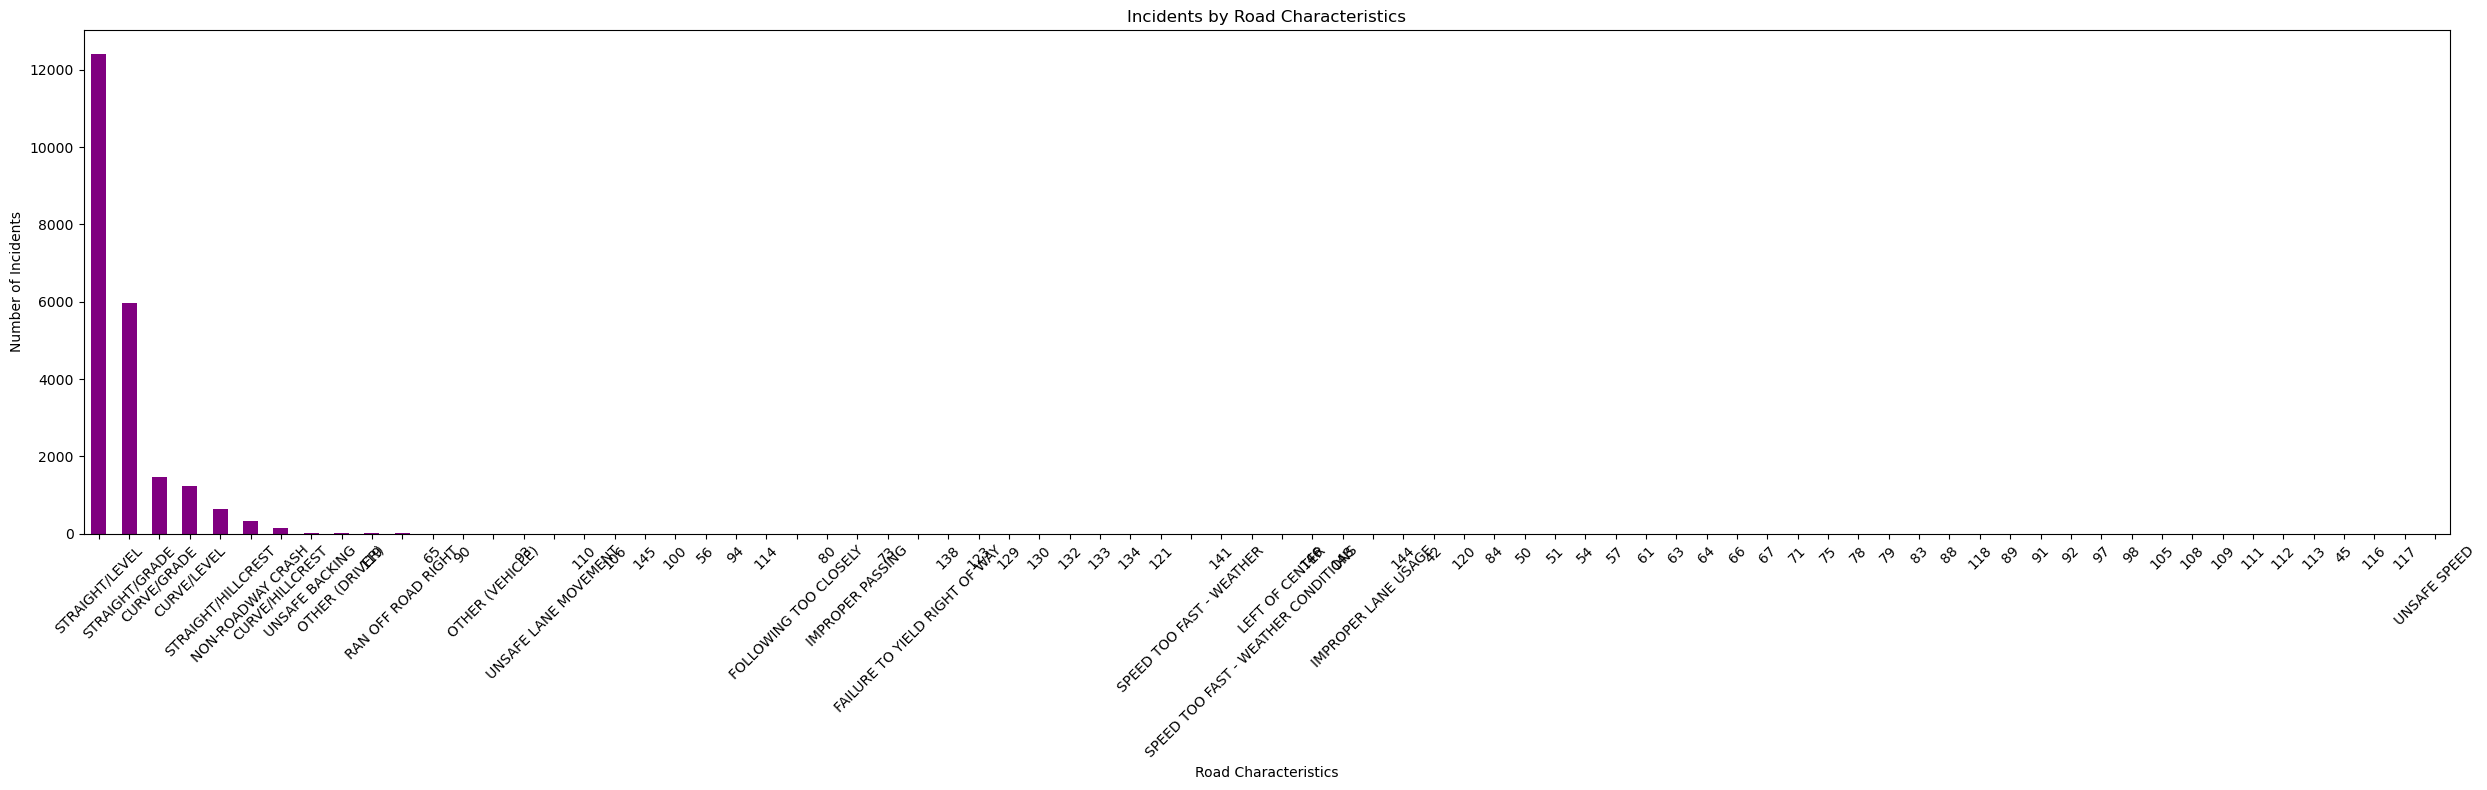

In [12]:
# Road Characteristics
road_conditions = incidents_data.groupby('RoadCharacteristics')['IncidentID'].count().sort_values(ascending=False)
plt.figure(figsize=(25, 8))
road_conditions.plot(kind='bar', color='purple')
plt.title('Incidents by Road Characteristics')
plt.xlabel('Road Characteristics')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 4. Traffic Logs Analysis

In [10]:
# Plotting vehicle counts and average speeds

# Convert LogDate to datetime format
traffic_logs_data['LogDate'] = pd.to_datetime(traffic_logs_data['LogDate'], errors='coerce')


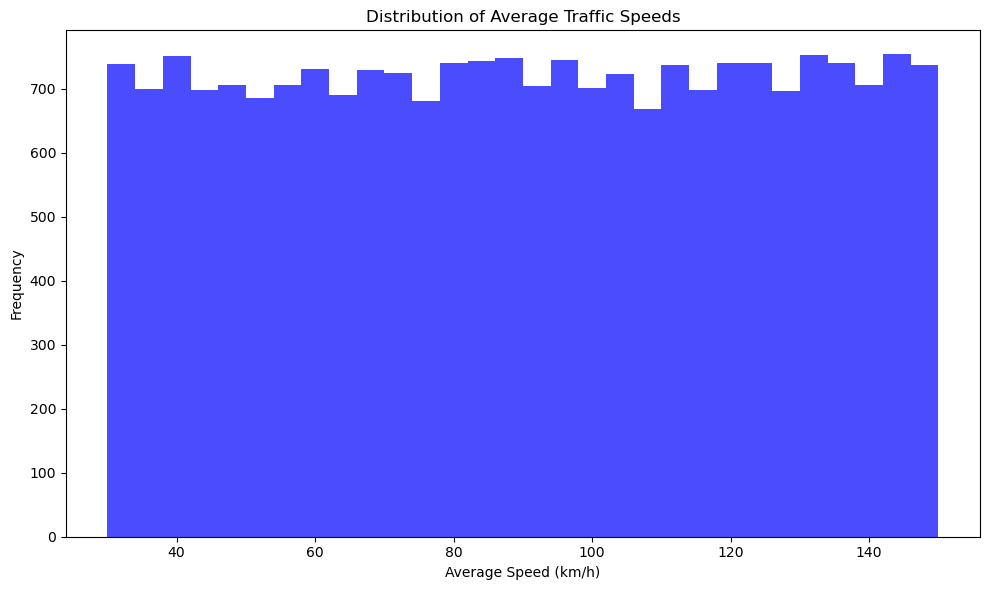

In [11]:
# Plot average speed distribution
plt.figure(figsize=(10, 6))
plt.hist(traffic_logs_data['AverageSpeed'], bins=30, color='blue', alpha=0.7)
plt.title('Distribution of Average Traffic Speeds')
plt.xlabel('Average Speed (km/h)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


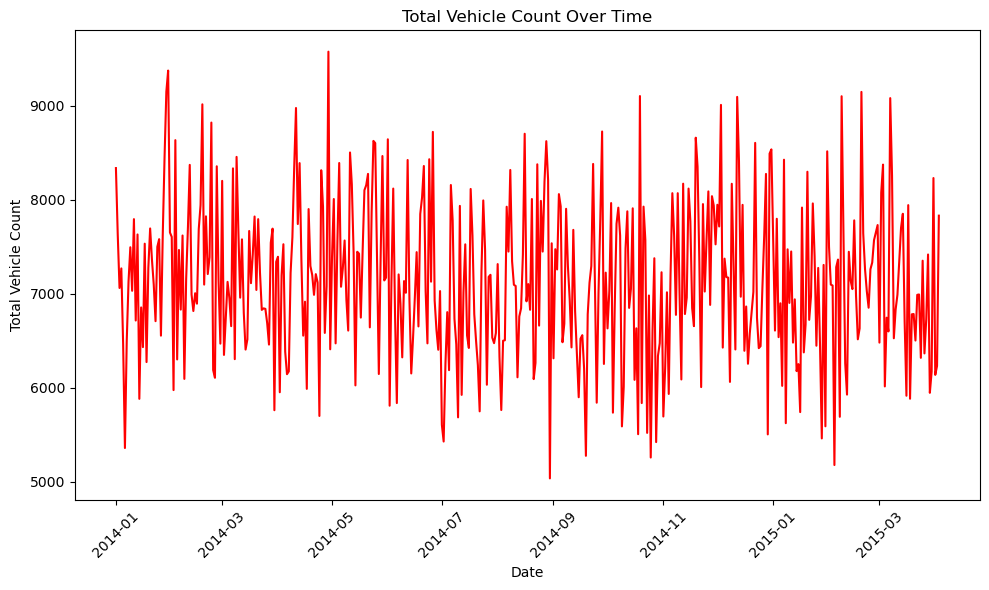

In [12]:
# Plot vehicle counts over time
vehicle_count_by_time = traffic_logs_data.groupby(traffic_logs_data['LogDate'].dt.date)['VehicleCount'].sum()
plt.figure(figsize=(10, 6))
vehicle_count_by_time.plot(color='red')
plt.title('Total Vehicle Count Over Time')
plt.xlabel('Date')
plt.ylabel('Total Vehicle Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [14]:
# 5. Sensor Data Analysis


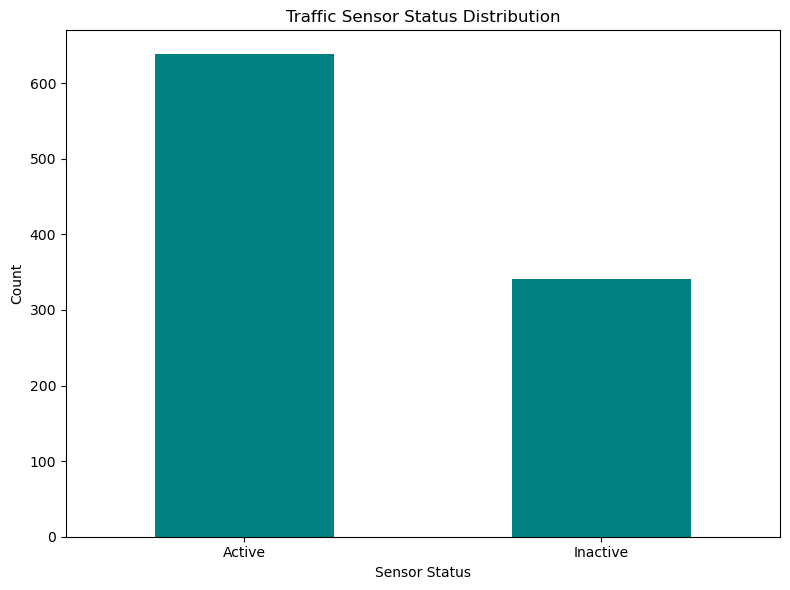

In [15]:
# Check the status of traffic sensors

sensor_status = traffic_sensor_data['Status'].value_counts()
plt.figure(figsize=(8, 6))
sensor_status.plot(kind='bar', color='teal')
plt.title('Traffic Sensor Status Distribution')
plt.xlabel('Sensor Status')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


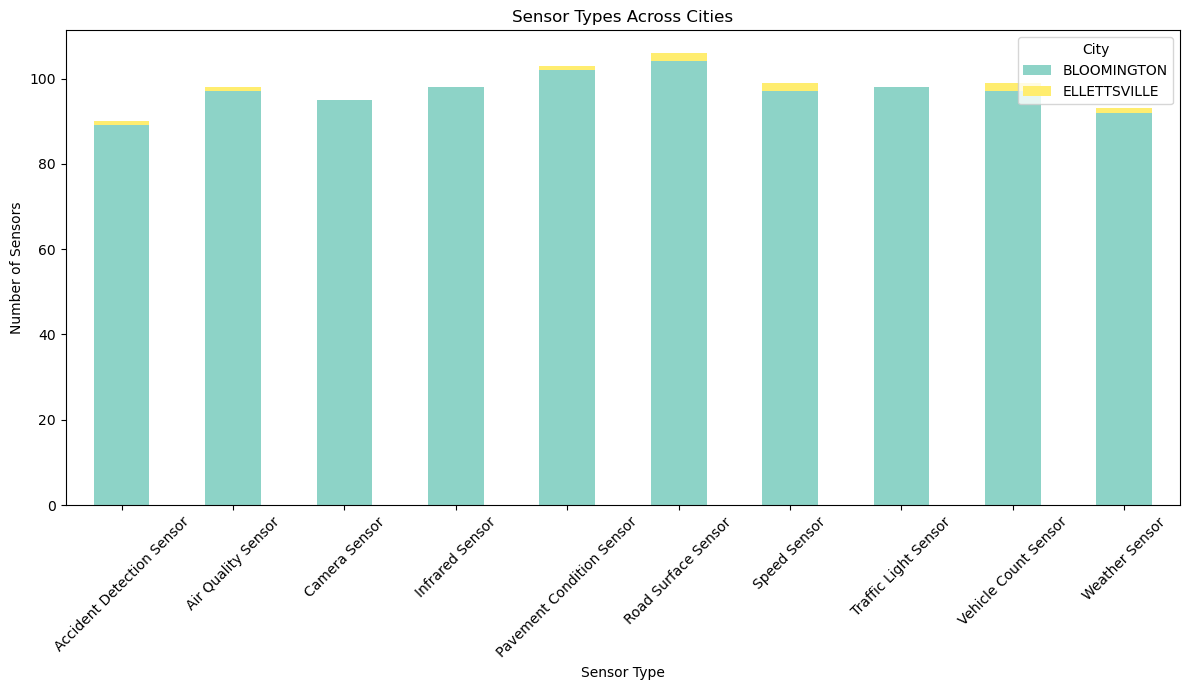

In [16]:
# Analysis of sensor types and their locations
sensor_type_location = traffic_sensor_data.groupby(['SensorType', 'City'])['SensorID'].count().unstack().fillna(0)
sensor_type_location.plot(kind='bar', stacked=True, figsize=(12, 7), colormap='Set3')
plt.title('Sensor Types Across Cities')
plt.xlabel('Sensor Type')
plt.ylabel('Number of Sensors')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()